In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [2]:
positive_points=np.array([(-2,3),(0,1),(2,-1)])
negative_points=np.array([(-2,1),(0,-1),(2,-3)])



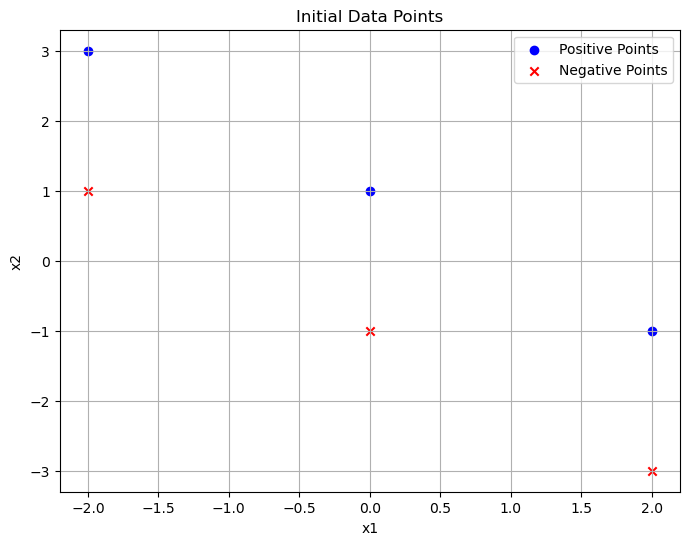

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(positive_points[:, 0], positive_points[:, 1], color='blue',marker='o', label='Positive Points')
plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', marker='x', label='Negative Points')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Initial Data Points')
plt.grid(True)
plt.show()

In [4]:
X=np.vstack((positive_points, negative_points))
y=np.array([1]*len(positive_points) + [-1]*len(negative_points))

In [5]:
X

array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [6]:
y

array([ 1,  1,  1, -1, -1, -1])

In [11]:
def perceptron(X,y,steps=10):
    theta = np.zeros(X.shape[1])
    theta0=0
    for t in range(steps):
        for i,xi in enumerate(X):
            if y[i] * (np.dot(X[i], theta) + theta0) <= 0:
                theta += y[i] * X[i]
                theta0 += y[i]
                break
        plot_decision_boundary(theta, theta0, t+1)
    return theta, theta0    


In [13]:

def plot_decision_boundary(theta, theta0, iteration):
    plt.figure(figsize=(8, 6))
    plt.scatter(positive_points[:, 0], positive_points[:, 1], color='blue',label='Positive Points')
    plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label='Negative Points')
    x_vals = np.linspace(-3, 3, 2)
    if(theta[1]!=0):
        y_vals = -(theta[0] * x_vals + theta0) / theta[1]
        plt.plot(x_vals, y_vals, label=f"Decision Boundary (Iteration {iteration})", color='green')
    else:
        plt.axvline(x=-theta0/theta[0], color='green', label=f'Decision Boundary (Iteration {iteration})')

    plt.xlim(-3, 3)
    plt.ylim(-4, 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Decision Boundary at Iteration {iteration}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()





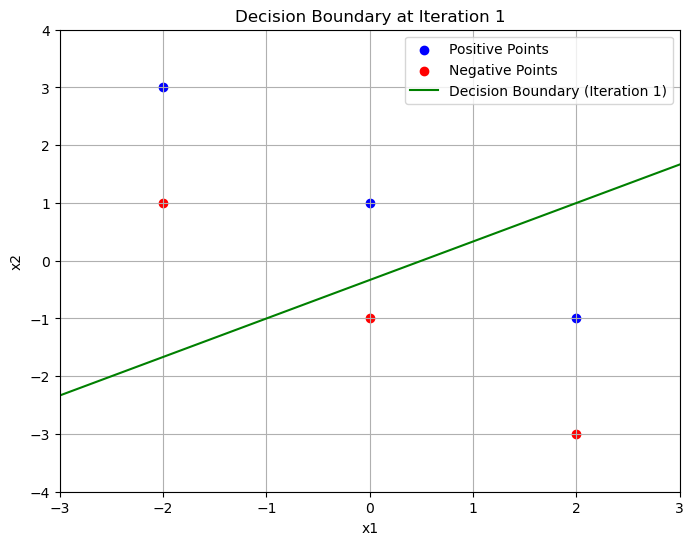

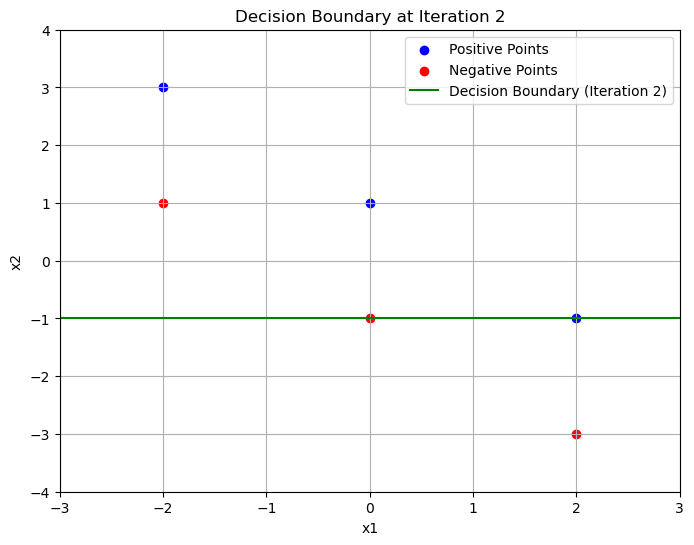

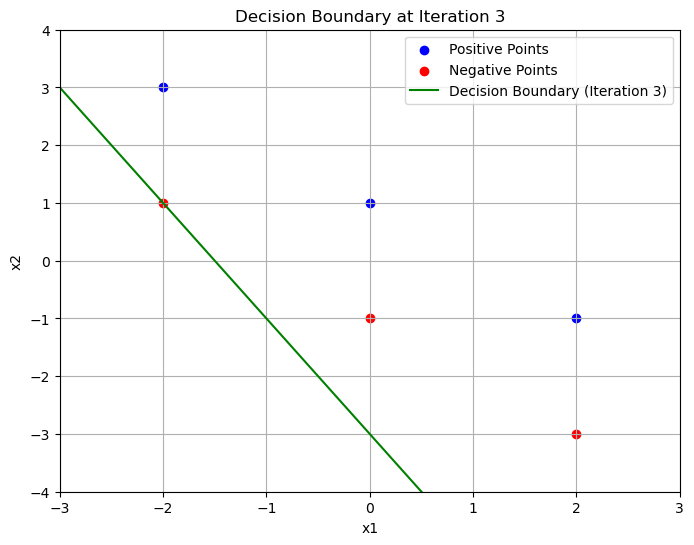

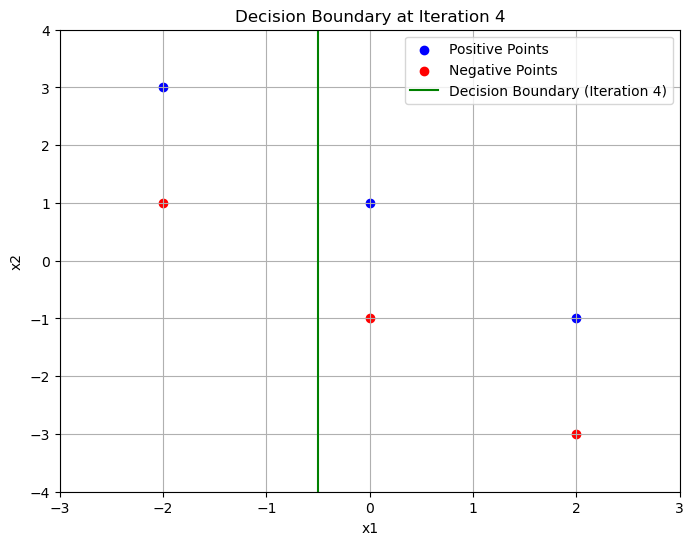

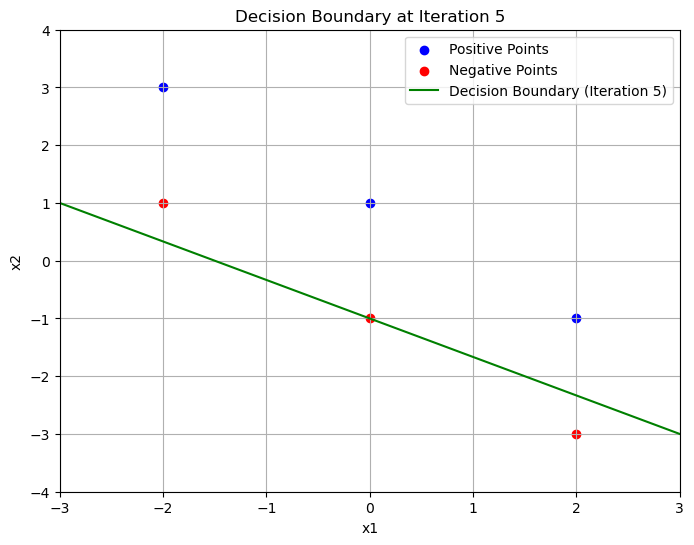

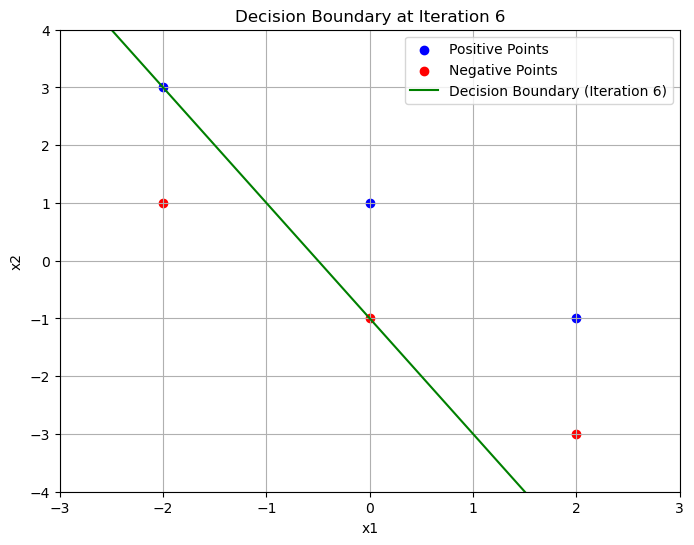

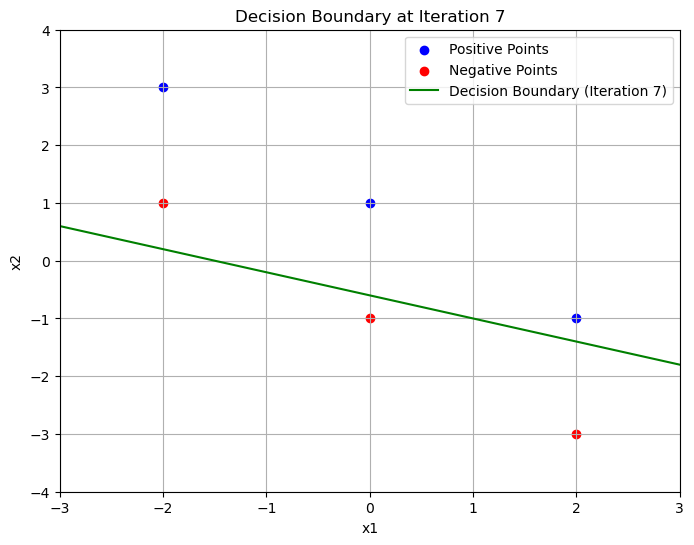

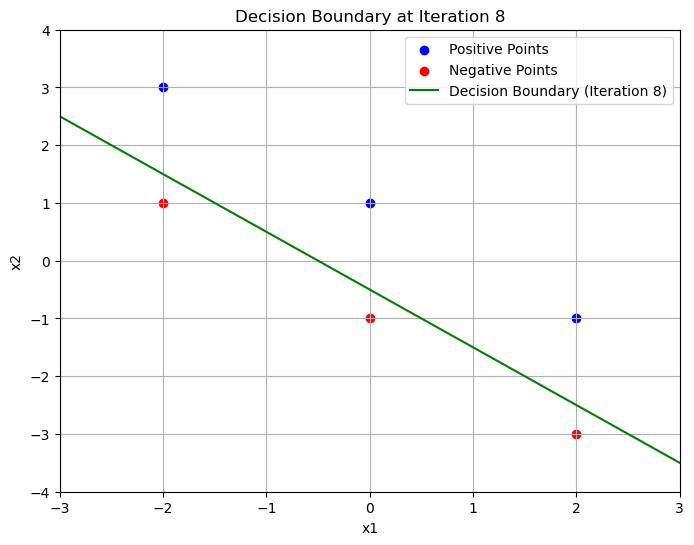

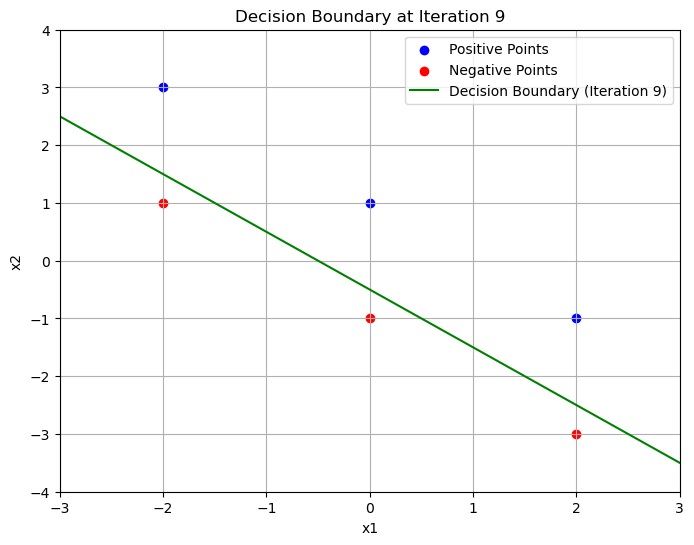

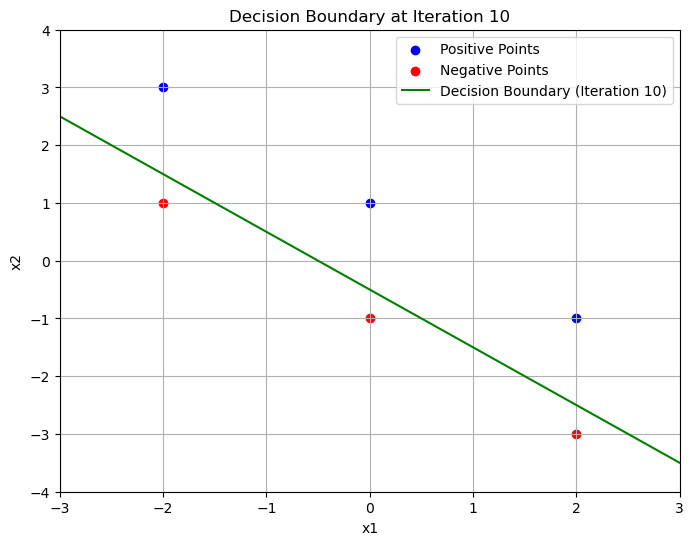

In [14]:
thetaFinal,theta0Final = perceptron(X, y, steps=10)